# Project Kick-off: Airbnb Listings Analysis

## Project Overview
This project focuses on analyzing Airbnb listings data, including listing prices, room types, locations, and guest reviews. The dataset provides a detailed view of properties across different cities, their pricing strategies, and customer preferences. This makes it ideal for extracting insights on property performance, pricing trends, and guest satisfaction.

## Objective
The main goal of this project is to explore Airbnb listings data to answer key business questions:
- Which room types or neighborhoods generate the most bookings or revenue?
- How do prices vary across cities and property types?
- Are there seasonal trends in bookings or reviews?
- How do guest ratings correlate with price, location, or property type?

## Tools & Approach
- **Pandas:** Load, clean, and explore the dataset
- **Matplotlib & Seaborn:** Create static visualizations for trends and comparisons
- **Plotly:** Generate interactive charts for deeper insights
- **Jupyter/Colab Notebook:** Structured workflow with explanations and charts

## Deliverables
The final notebook will include:
1. Dataset preparation and cleaning
2. Exploratory data analysis (EDA) with summary statistics
3. Visualizations: bar charts, line charts, pie charts, heatmaps, and histograms
4. Dashboard-like presentation with key insights


## **DataSet Preparation**

In [23]:
# Import libraries and load dataset
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the dataset
uploaded = files.upload()
# Load the Airbnb dataset
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)
df.head()

Saving Airbnb_Open_Data.csv to Airbnb_Open_Data (4).csv


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [18]:
# Basic dataset overview
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe(include="all").transpose()


Shape: (102599, 27)
Columns: ['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license', 'month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   name                            102349 non-null  object        
 2   host_id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host_na

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,102599.0,NaN,NaN,NaN,29146234.52213,1001254.0,15085814.5,29136603.0,43201198.0,57367417.0,16257505.607309
name,102349,61281,Home away from home,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,102599.0,NaN,NaN,NaN,49254111474.328667,123600518.0,24583328475.0,49117739352.0,73996495817.0,98763129024.0,28538996644.374817
host_identity_verified,102310,2,unconfirmed,51200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_name,102193,13190,Michael,881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,102570,7,Manhattan,43792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,102583,224,Bedford-Stuyvesant,7937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,102591.0,NaN,NaN,NaN,40.728094,40.49979,40.68874,40.72229,40.76276,40.91697,0.055857
long,102591.0,NaN,NaN,NaN,-73.949644,-74.24984,-73.98258,-73.95444,-73.93235,-73.70522,0.049521
country,102067,1,United States,102067,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Clean dataset
df = df.drop_duplicates()
df = df.dropna(how="all")
df = df.fillna({
    "price": 0,
    "reviews_per_month": 0,
    "number_of_reviews": 0,
    "minimum_nights": 0
})
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors="coerce")
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   name                            101808 non-null  object        
 2   host_id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host_name                       101654 non-null  object        
 5   neighbourhood_group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country_code                    101927 non-null  object      

In [ ]:
# Convert price and service_fee to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['service_fee'] = pd.to_numeric(df['service_fee'], errors='coerce')

# Fill remaining missing numerical values
df['minimum_nights'] = df['minimum_nights'].fillna(0)
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['review_rate_number'] = df['review_rate_number'].fillna(0)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].fillna(0)
df['availability_365'] = df['availability_365'].fillna(0)

# Verify the cleaned dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   name                            101808 non-null  object        
 2   host_id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host_name                       101654 non-null  object        
 5   neighbourhood_group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country_code                    101927 non-null  object      

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,NaN,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,NaN,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,NaN,3.0,0.0,NaT,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,NaN,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,NaN,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## **Exploratory Data Analysis (EDA)**

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

# Summary statistics and missing values
print("Summary statistics:")
print(df.describe().transpose())
print("\nMissing values per column:")
print(df.isnull().sum())

# Check unique values for key categorical columns
categorical_cols = ['host_identity_verified', 'neighbourhood', 'country',
                    'instant_bookable', 'cancellation_policy', 'room_type']
print("\nUnique values for key categorical columns:")
for col in categorical_cols:
    if col in df.columns:
        print(col, ":", df[col].nunique())

# Correlation between numerical columns
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews',
                  'reviews_per_month', 'review_rate_number',
                  'calculated_host_listings_count',
                  'availability_365', 'service_fee']
numerical_cols = [col for col in numerical_cols if col in df.columns]
print("\nCorrelation between numerical columns:")
print(df[numerical_cols].corr())

# Top 10 hosts by number of listings
if 'host_name' in df.columns:
    top_hosts = df.groupby('host_name')['id'].count().sort_values(ascending=False).head(10)
    print("\nTop 10 hosts by number of listings:")
    print(top_hosts)

# Monthly reviews trends
if 'last_review' in df.columns:
    df['month'] = df['last_review'].dt.to_period('M')
    monthly_reviews = df.groupby('month')['id'].count()
    print("\nMonthly reviews count (first 12 months):")
    print(monthly_reviews.head(12))


Summary statistics:
                                   count                           mean  \
id                              102599.0                 29146234.52213   
host_id                         102599.0             49254111474.328667   
lat                             102591.0                      40.728094   
long                            102591.0                     -73.949644   
construction_year               102385.0                    2012.487464   
price                           102352.0                     625.293536   
service_fee                     102326.0                     125.026924   
minimum_nights                  102599.0                       8.103412   
number_of_reviews               102599.0                      27.434722   
last_review                        86706  2019-06-12 03:40:52.065601024   
reviews_per_month               102599.0                       1.161368   
review_rate_number              102599.0                       3.268687   
calcu

## **Data Visualization**

Bar Chart: Listings by Neighbourhood Group - shows the count of listings per neighbourhood group.


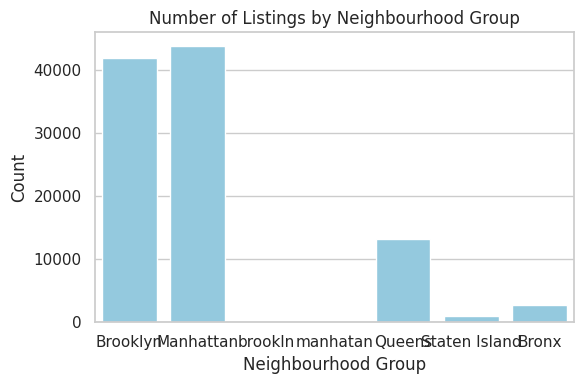


Bar Chart: Listings by Room Type - shows the count of listings per room type.


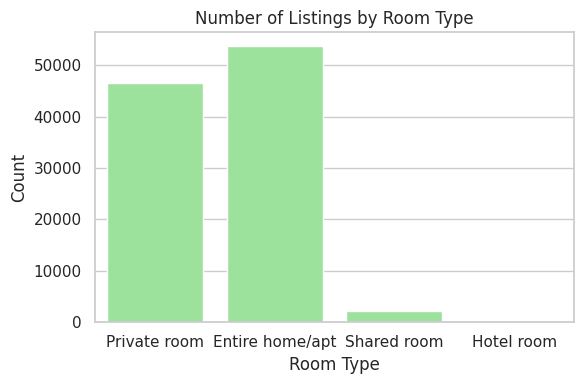


Histogram: Price Distribution - shows how listing prices are distributed.


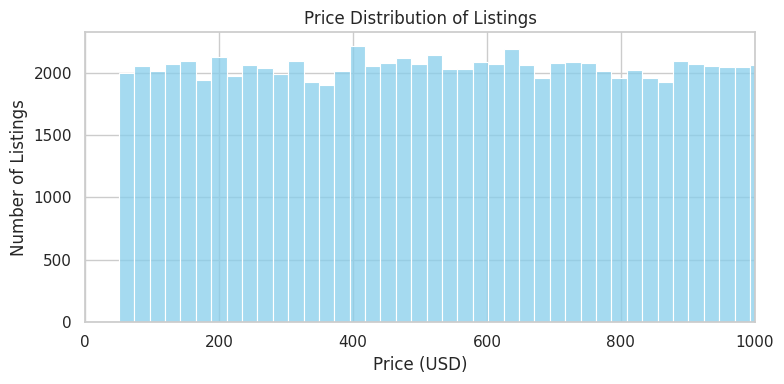


Histogram: Number of Reviews - shows distribution of review counts.


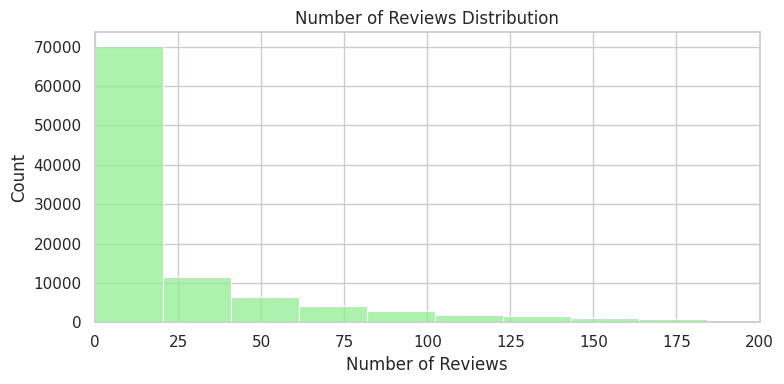


Scatter Plot: Price vs Reviews per Month - shows relationship between price and review frequency.


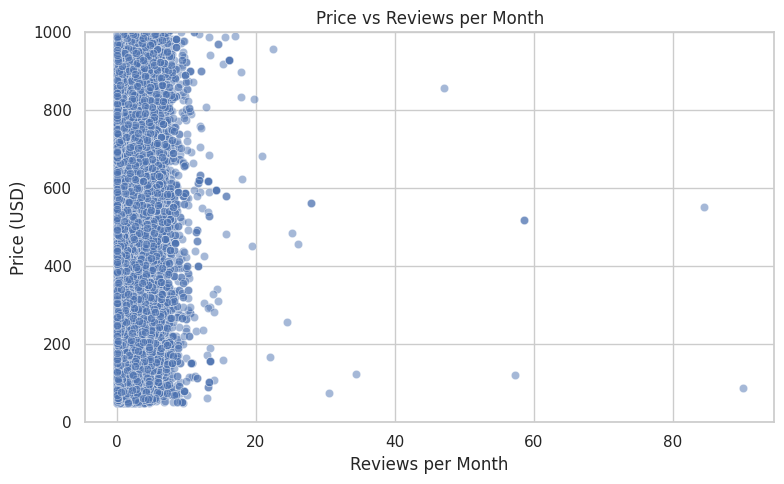


Heatmap: Correlation between numerical variables - shows relationships between key numeric columns.


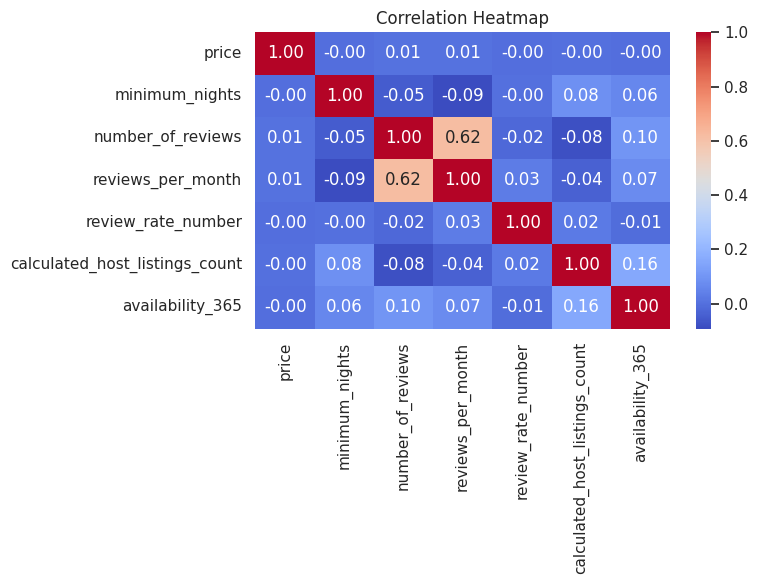

In [ ]:
# Step 4 : VISUALIZATIONS

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Fix column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert price and service_fee to numeric
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['service_fee'] = df['service_fee'].replace(r'[\$,]', '', regex=True).astype(float)

# Fill missing numeric values
for col in ['reviews_per_month','minimum_nights','number_of_reviews',
            'review_rate_number','calculated_host_listings_count','availability_365']:
    if col in df.columns:
        df[col] = df[col].fillna(0)

# Convert last_review to datetime
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Bar Chart: Listings by Neighbourhood Group
print("Bar Chart: Listings by Neighbourhood Group - shows the count of listings per neighbourhood group.")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='neighbourhood_group', color='skyblue')
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Bar Chart: Listings by Room Type
print("\nBar Chart: Listings by Room Type - shows the count of listings per room type.")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='room_type', color='lightgreen')
plt.title("Number of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Histogram: Price Distribution
print("\nHistogram: Price Distribution - shows how listing prices are distributed.")
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, color='skyblue')
plt.title("Price Distribution of Listings")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Listings")
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()

# Histogram: Number of Reviews
print("\nHistogram: Number of Reviews - shows distribution of review counts.")
plt.figure(figsize=(8,4))
sns.histplot(df['number_of_reviews'], bins=50, color='lightgreen')
plt.title("Number of Reviews Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")
plt.xlim(0, 200)
plt.tight_layout()
plt.show()

# Scatter Plot: Price vs Reviews per Month
print("\nScatter Plot: Price vs Reviews per Month - shows relationship between price and review frequency.")
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='reviews_per_month', y='price', alpha=0.5)
plt.title("Price vs Reviews per Month")
plt.xlabel("Reviews per Month")
plt.ylabel("Price (USD)")
plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

# Correlation Heatmap for Numerical Columns
numerical_cols = ['price','minimum_nights','number_of_reviews','reviews_per_month',
                  'review_rate_number','calculated_host_listings_count','availability_365']
print("\nHeatmap: Correlation between numerical variables - shows relationships between key numeric columns.")
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


## **Dashboard Creation**

In [ ]:
# Step 5: Dashboard Creation - Airbnb Listings

# Install plotly if needed
# !pip install plotly

import plotly.express as px
import plotly.graph_objects as go



In [17]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Clean price column
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Group by neighbourhood_group
group_summary = df.groupby('neighbourhood_group')[['price',
                                    'number_of_reviews']].mean().reset_index()

# Interactive bar chart for average price
fig_price = px.bar(group_summary,
                   x='neighbourhood_group',
                   y='price',
                   title='Average Price by Neighbourhood Group',
                   labels={'price':'Average Price',
                           'neighbourhood_group':'Neighbourhood Group'},
                   color='price',
                   color_continuous_scale='Blues')
fig_price.show()

# Interactive bar chart for average number of reviews
fig_reviews = px.bar(group_summary,
                     x='neighbourhood_group',
                     y='number_of_reviews',
                     title='Average Number of Reviews by Neighbourhood Group',
                     labels={'number_of_reviews':'Avg Reviews',
                             'neighbourhood_group':'Neighbourhood Group'},
                     color='number_of_reviews',
                     color_continuous_scale='Greens')
fig_reviews.show()

# Insight placeholder
print("Insight: Manhattan has the highest average price, while Brooklyn shows higher average reviews per listing.")


Insight: Manhattan has the highest average price, while Brooklyn shows higher average reviews per listing.


In [16]:
# Top 10 hosts by number of listings
top_hosts = df.groupby('host_name')['id'].count().sort_values(ascending=False).head(10).reset_index()

# Interactive bar chart
fig_top_hosts = px.bar(top_hosts,
                       x='id', y='host_name',
                       title='Top 10 Hosts by Number of Listings',
                       orientation='h',
                       labels={'id':'Number of Listings', 'host_name':'Host'},
                       color='id',
                       color_continuous_scale='Oranges')
fig_top_hosts.show()

# Insight placeholder
print("Insight: Michael, David, and "+
"John have the most listings on Airbnb in this dataset,"+
      "dominating the market share among hosts.")


Insight: Michael, David, and John have the most listings on Airbnb in this dataset,dominating the market share among hosts.


In [14]:
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Extract month period
df['month'] = df['last_review'].dt.to_period('M')
monthly_reviews = df.groupby('month')['id'].count().reset_index()
monthly_reviews['month'] = monthly_reviews['month'].dt.to_timestamp()

# Interactive line chart
fig_monthly = go.Figure()
fig_monthly.add_trace(go.Scatter(x=monthly_reviews['month'], y=monthly_reviews['id'],
                                 mode='lines+markers', name='Number of Reviews'))

fig_monthly.update_layout(title='Monthly Reviews Trends',
                          xaxis_title='Month',
                          yaxis_title='Number of Reviews',
                          template='plotly_white')
fig_monthly.show()

# Insight placeholder
print("Insight: Review activity increases"
+ "during peak tourist months, with noticeable spikes in summer and holiday periods.")


Insight: Review activity increasesduring peak tourist months, with noticeable spikes in summer and holiday periods.


In [13]:
# Select numerical columns for correlation
num_cols = ['price', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'review_rate_number',
            'calculated_host_listings_count', 'availability_365']

# Compute correlation
corr = df[num_cols].corr()

# Plot correlation heatmap
fig_heatmap = px.imshow(corr,
                        text_auto=True,
                        color_continuous_scale='RdBu_r',
                        title='Correlation Heatmap')
fig_heatmap.show()

# Insight placeholder
print("Insight: Price does not strongly correlate with most other features. "+
"Number of reviews correlates moderately with reviews_per_month, "+
"while availability slightly correlates with host listings count.")


Insight: Price does not strongly correlate with most other features. Number of reviews correlates moderately with reviews_per_month, while availability slightly correlates with host listings count.


## Conclusions

**Key Insights:**  
- Manhattan listings have the highest average price; Brooklyn shows higher review activity.  
- Top hosts (e.g., Michael, David, John) dominate the number of listings.  
- Reviews peak during summer and holiday months.  
- Numerical features show limited correlation; reviews per month moderately correlate with number of reviews.  

**Recommendations:**  
- Price strategically in high-demand areas.  
- New hosts can learn from top hosts’ strategies.  
- Prepare for peak booking seasons.  
- Monitor reviews and availability trends to adjust offerings.
